<a href="https://colab.research.google.com/github/Tushar-Keshari/Deep-Learning/blob/main/Sports_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Tushar Keshari
#U21EC084

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
!kaggle datasets download -d gpiosenka/sports-classification

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/sports-classification
License(s): CC0-1.0
 98% 415M/424M [00:01<00:00, 290MB/s]
100% 424M/424M [00:01<00:00, 256MB/s]


In [5]:
!unzip sports-classification.zip -d sample_data

Streaming output truncated to the last 5000 lines.
  inflating: sample_data/train/rings/022.jpg  
  inflating: sample_data/train/rings/023.jpg  
  inflating: sample_data/train/rings/024.jpg  
  inflating: sample_data/train/rings/025.jpg  
  inflating: sample_data/train/rings/026.jpg  
  inflating: sample_data/train/rings/027.jpg  
  inflating: sample_data/train/rings/028.jpg  
  inflating: sample_data/train/rings/029.jpg  
  inflating: sample_data/train/rings/030.jpg  
  inflating: sample_data/train/rings/031.jpg  
  inflating: sample_data/train/rings/032.jpg  
  inflating: sample_data/train/rings/033.jpg  
  inflating: sample_data/train/rings/034.jpg  
  inflating: sample_data/train/rings/035.jpg  
  inflating: sample_data/train/rings/036.jpg  
  inflating: sample_data/train/rings/037.jpg  
  inflating: sample_data/train/rings/038.jpg  
  inflating: sample_data/train/rings/039.jpg  
  inflating: sample_data/train/rings/040.jpg  
  inflating: sample_data/train/rings/041.jpg  
  inflati

In [44]:
image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/sample_data/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/sample_data/valid',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 10834 images belonging to 100 classes.
Found 100 images belonging to 100 classes.


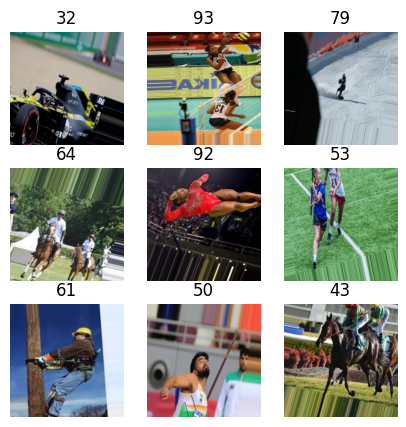

In [45]:
import matplotlib.pyplot as plt

sample_images, sample_labels = next(train_generator)
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    plt.title(np.argmax(sample_labels[i]))
    plt.axis('off')
plt.show()

In [47]:
#model defination
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(3,3),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(3,3),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(3,3),
    Dropout(0.2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(100, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 9, 9, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 882,468 (3.37 MB)

 Trainable params: 882,468 (3.37 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
339/339 ━━━━━━━━━━━━━━━━━━━━ 138s 386ms/step - accuracy: 0.0193 - loss: 4.5489 - val_accuracy: 0.0300 - val_loss: 3.9843
Epoch 2/15
339/339 ━━━━━━━━━━━━━━━━━━━━ 128s 369ms/step - accuracy: 0.0805 - loss: 3.9110 - val_accuracy: 0.2000 - val_loss: 3.3155
Epoch 3/15
339/339 ━━━━━━━━━━━━━━━━━━━━ 128s 367ms/step - accuracy: 0.1374 - loss: 3.5040 - val_accuracy: 0.2300 - val_loss: 3.0069
Epoch 4/15
339/339 ━━━━━━━━━━━━━━━━━━━━ 143s 370ms/step - accuracy: 0.2161 - loss: 3.1593 - val_accuracy: 0.2900 - val_loss: 2.7437
Epoch 5/15
339/339 ━━━━━━━━━━━━━━━━━━━━ 147s 386ms/step - accuracy: 0.2595 - loss: 2.9208 - val_accuracy: 0.3700 - val_loss: 2.5749
Epoch 6/15
339/339 ━━━━━━━━━━━━━━━━━━━━ 137s 374ms/step - accuracy: 0.3050 - loss: 2.6853 - val_accuracy: 0.4100 - val_loss: 2.4748
Epoch 7/15
339/339 ━━━━━━━━━━━━━━━━━━━━ 128s 371ms/step - accuracy: 0.3249 - loss: 2.5562 - val_accuracy: 0.3900 - val_loss: 2.4519
Epoch 8/15
339/339 ━━━━━━━━━━━━━━━━━━━━ 128s 371ms/step - accuracy: 0.3450 -

In [49]:
model.evaluate(validation_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.5155 - loss: 1.7362


[1.7529510259628296, 0.5099999904632568]

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = validation_generator.classes

y_pred = model.predict(validation_generator)
y_pred_classes = [np.argmax(pred) for pred in y_pred]

print(classification_report(y_true, y_pred_classes))



4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

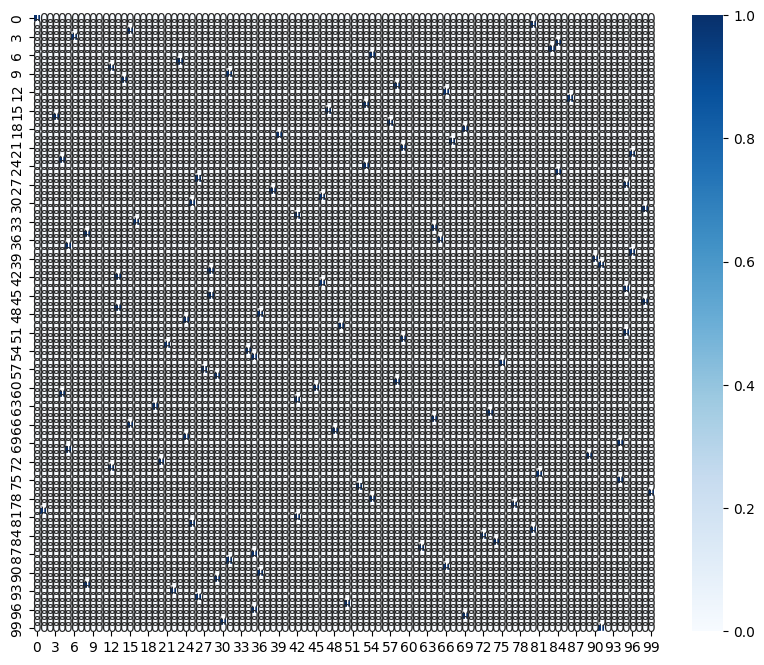

In [51]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step


<Figure size 500x500 with 0 Axes>

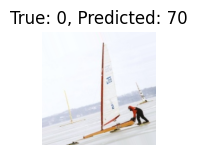

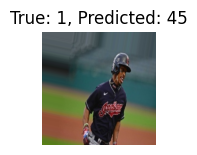

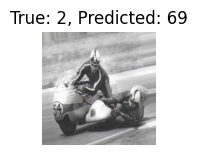

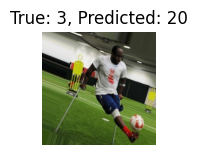

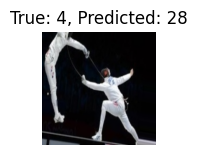

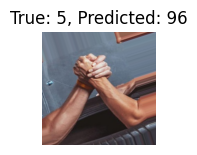

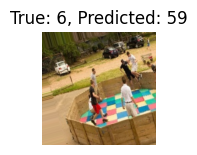

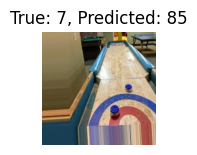

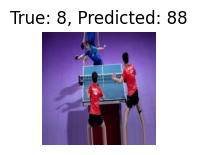

In [64]:

y_pred = model.predict(validation_generator)
y_pred_classes = [np.argmax(pred) for pred in y_pred]

y_true = validation_generator.classes

misclassified_indices = np.where(y_true != np.array(y_pred_classes))[0]

plt.figure(figsize=(5, 5))
for i in misclassified_indices[:9]:
  image, label = validation_generator[i // validation_generator.batch_size][0][i % validation_generator.batch_size], validation_generator[i // validation_generator.batch_size][1][i % validation_generator.batch_size]

  true_label = y_true[i]
  predicted_label = y_pred_classes[i]

  plt.figure(figsize=(5,5))
  plt.subplot(3, 3, i+1)
  plt.imshow(image)
  plt.title(f"True: {true_label}, Predicted: {predicted_label}")
  plt.axis('off')
plt.show()
